# Monte Carlo System for simple 2x2 DiFnDif

ATE

$ Y_{it} = \beta_0 + \beta_1 \text{Post}_t + \beta_2 \text{Treatment}_i + \beta_3 (\text{Post}_t \times \text{Treatment}_i) + \sum_{k=1}^{K} \beta_{k+3} (\text{X}_i = k \times \text{Treatment}_i) + \epsilon_{it} $

Where:
- $ Y_{it} $ represents the outcome variable (e.g., wages) for individual $ i $ at time $ t $.
- $ \text{Post}_t $ is a binary variable indicating whether the observation is from the post-treatment period.
- $ \text{Treatment}_i $ is a binary variable indicating whether individual $ i $ is in the treatment group.
- $ \text{X}_i $ is a categorical variable representing a conditioning variable (e.g., education level) for individual $ i $.
- $ K $ is the total number of levels of the conditioning variable.
- $ \beta_{k+3} $ represents the coefficient for the interaction between the conditioning variable level $ k $ and the treatment indicator.
- $ \epsilon_{it} $ is the error term.

1. **Estimated Treatment Effect ($ \beta $)**:
   The treatment effect ($ \beta $) is the coefficient associated with the interaction term between the treatment indicator and the post-treatment period indicator. Mathematically, it is given by:

   $ \beta = \text{Coefficient of } (\text{Post} \times \text{Treatment}) $

2. **Standard Error ($ SE $)**:
   The standard error ($ SE $) of the treatment effect estimates how much the estimated treatment effect varies across different samples. It can be calculated as the square root of the variance of the coefficient estimate. 

3. **t-statistic ($ t $)**:
   The t-statistic ($ t $) is a measure of the signal-to-noise ratio in the estimated treatment effect. It is calculated by dividing the estimated treatment effect by its standard error. Mathematically, it can be expressed as:

   $ t = \frac{\beta}{SE} $

- data generating process fertig machen mit richtiger verteilung
- monte carlo machen
- simulationsergebnisse und true values vergleichen 

# Monte Carlo for homogenous Treatment effects

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Set a seed value for reproducibility
np.random.seed(42)

# Set the coefficients (betas)
true_beta_A = 2
true_beta_B = 3
true_beta_C = 6

# Set the number of simulations
num_simulations = 1000

# Initialize lists to store estimated coefficients
estimated_beta_A_list = []
estimated_beta_B_list = []
estimated_beta_C_list = []

# Perform the simulations
for _ in range(num_simulations):
    # Generate random binary variables A, B, and C
    A = np.random.randint(0, 2, size=num_simulations)
    B = np.random.randint(0, 2, size=num_simulations)
    C = A * B  # Interaction term of A and B

    # Generate random control variables
    control_1 = np.random.normal(0, 1, size=num_simulations)
    control_2 = np.random.normal(0, 1, size=num_simulations)

    mean_error = 0  # Mean of the error term
    std_error = 10  # Standard deviation of the error term
    error = np.random.normal(mean_error, std_error, size=num_simulations)

    # Generate normally distributed outcome variable (wage)
    mean_wage = 50  # Mean wage
    std_wage = 10  # Standard deviation of wage
    wage = (
        mean_wage
        + true_beta_A * A
        + true_beta_B * B
        + true_beta_C * C
        + control_1
        + control_2
        + error
    )

    # Create a DataFrame for the variables
    data = pd.DataFrame(
        {
            "A": A,
            "B": B,
            "C": C,
            "Control_1": control_1,
            "Control_2": control_2,
            "Wage": wage,
        },
    )

    # Create the model
    X = sm.add_constant(data[["A", "B", "C", "Control_1", "Control_2"]])
    y = data["Wage"]
    model = sm.OLS(y, X)
    results = model.fit()

    # Extract the estimated coefficients and append to the lists
    estimated_beta_A_list.append(results.params["A"])
    estimated_beta_B_list.append(results.params["B"])
    estimated_beta_C_list.append(results.params["C"])

# Calculate the average estimated coefficients
average_estimated_beta_A = np.mean(estimated_beta_A_list)
average_estimated_beta_B = np.mean(estimated_beta_B_list)
average_estimated_beta_C = np.mean(estimated_beta_C_list)

# Print the true coefficients and the average estimated coefficients
print("True Coefficients:")
print("Beta_A:", true_beta_A)
print("Beta_B:", true_beta_B)
print("Beta_C:", true_beta_C)
print("\nAverage Estimated Coefficients:")
print("Beta_A (Average Estimated):", average_estimated_beta_A)
print("Beta_B (Average Estimated):", average_estimated_beta_B)
print("Beta_C (Average Estimated):", average_estimated_beta_C)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine the estimated coefficients into a single DataFrame
df = pd.DataFrame(
    {
        "A": estimated_beta_A_list,
        "B": estimated_beta_B_list,
        "C": estimated_beta_C_list,
    },
)

# Plot kernel density estimates for each coefficient
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, fill=True, palette="Set1")
plt.axvline(x=true_beta_A, color="red", linestyle="--", label="True Beta A")
plt.axvline(x=true_beta_B, color="blue", linestyle="--", label="True Beta B")
plt.axvline(x=true_beta_C, color="green", linestyle="--", label="True Beta C")
plt.title("Kernel Density Plot of Estimated Coefficients")
plt.xlabel("Estimated Coefficient Value")
plt.ylabel("Density")
plt.legend()
plt.show()

# Monte Carlo for hetergenous Treatment effects 

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Set a seed value for reproducibility
np.random.seed(42)

# Set the true coefficients
true_beta_A = 2
true_beta_B = 3
true_beta_C = 6
true_beta_A_X = -20  # Interaction effect of A and covariate X
true_beta_B_X = 40  # Interaction effect of B and covariate X

# Set the number of simulations
num_simulations = 1000

# Initialize lists to store estimated coefficients for both models
estimated_beta_homogeneous_list = []
estimated_beta_heterogeneous_list = []

# Perform the simulations
for _ in range(num_simulations):
    # Generate random binary variables A, B, and C
    A = np.random.randint(0, 2, size=num_simulations)
    B = np.random.randint(0, 2, size=num_simulations)
    C = np.random.randint(0, 2, size=num_simulations)

    # Generate random covariate X
    X = np.random.normal(0, 5, size=num_simulations)

    # Generate random control variables
    control_1 = np.random.normal(0, 1, size=num_simulations)
    control_2 = np.random.normal(0, 1, size=num_simulations)

    mean_error = 0  # Mean of the error term
    std_error = 10  # Standard deviation of the error term
    error = np.random.normal(mean_error, std_error, size=num_simulations)

    # Generate normally distributed outcome variable (wage)
    mean_wage = 50  # Mean wage
    std_wage = 10  # Standard deviation of wage
    wage = (
        mean_wage
        + true_beta_A * A
        + true_beta_B * B
        + true_beta_C * C
        + true_beta_A_X * A * X
        + true_beta_B_X * B * X
        + control_1
        + control_2
        + error
    )

    # Create a DataFrame for the variables
    data = pd.DataFrame(
        {
            "A": A,
            "B": B,
            "C": C,
            "X": X,
            "Control_1": control_1,
            "Control_2": control_2,
            "Wage": wage,
        },
    )

    # Create the homogenous treatment effect model
    X_homogeneous = sm.add_constant(
        data[["A", "B", "C", "X", "Control_1", "Control_2"]],
    )
    y_homogeneous = data["Wage"]
    model_homogeneous = sm.OLS(y_homogeneous, X_homogeneous)
    results_homogeneous = model_homogeneous.fit()
    estimated_beta_homogeneous_list.append(results_homogeneous.params["C"])

    # Create the heterogeneous treatment effect model
    data["A_X"] = data["A"] * data["X"]
    data["B_X"] = data["B"] * data["X"]
    X_heterogeneous = sm.add_constant(
        data[["A", "B", "C", "X", "A_X", "B_X", "Control_1", "Control_2"]],
    )
    y_heterogeneous = data["Wage"]
    model_heterogeneous = sm.OLS(y_heterogeneous, X_heterogeneous)
    results_heterogeneous = model_heterogeneous.fit()
    estimated_beta_heterogeneous_list.append(results_heterogeneous.params["C"])

# Calculate the average estimated coefficients for both models
average_estimated_beta_homogeneous = np.mean(estimated_beta_homogeneous_list)
average_estimated_beta_heterogeneous = np.mean(estimated_beta_heterogeneous_list)

# Print the true coefficient and the average estimated coefficients for both models
print("True Coefficient (Heterogeneous Treatment Effect):", true_beta_C)
print(
    "Average Estimated Coefficient (Homogeneous Treatment Effect Model):",
    average_estimated_beta_homogeneous,
)
print(
    "Average Estimated Coefficient (Heterogeneous Treatment Effect Model):",
    average_estimated_beta_heterogeneous,
)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define custom colors for coefficients
homogeneous_color = "blue"
heterogeneous_color = "orange"

# Combine the estimated coefficients into DataFrames
homogeneous_df = pd.DataFrame(
    {"Coefficient": estimated_beta_homogeneous_list, "Model": "Homogeneous"},
)
heterogeneous_df = pd.DataFrame(
    {"Coefficient": estimated_beta_heterogeneous_list, "Model": "Heterogeneous"},
)

# Concatenate DataFrames
df = pd.concat([homogeneous_df, heterogeneous_df])

# Plot kernel density estimates for each coefficient
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=df,
    x="Coefficient",
    hue="Model",
    fill=True,
    palette={"Homogeneous": homogeneous_color, "Heterogeneous": heterogeneous_color},
)
plt.axvline(x=true_beta_C, color="green", linestyle="--", label="True Beta C")
plt.title("Kernel Density Plot of Estimated Coefficients")
plt.xlabel("Estimated Coefficient Value")
plt.ylabel("Density")
plt.legend()
plt.show()

# Deep Learning functioning

In [1]:
import matplotlib.pyplot as plt

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 10)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 60)           660         ['input_1[0][0]']                
                                                                                                  
 dropout (Dropout)              (None, 60)           0           ['dense[0][0]']                  
                                                                                                  
 dense_1 (Dense)                (None, 30)           1830        ['dropout[0][0]']                
                                                                                              

c:\Users\norma\.conda\envs\causal_net\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Training of the causal coefficients neural network:
1 epoch - loss: 2.5663  val loss: 2.2654
26 epoch - loss: 1.3224  val loss: 1.3331
51 epoch - loss: 1.2147  val loss: 1.1992
76 epoch - loss: 1.1504  val loss: 1.1360
101 epoch - loss: 1.0953  val loss: 1.0788
126 epoch - loss: 1.0587  val loss: 1.0437
151 epoch - loss: 1.0332  val loss: 1.0208
176 epoch - loss: 1.0138  val loss: 1.0056
201 epoch - loss: 1.0029  val loss: 0.9965
226 epoch - loss: 0.9980  val loss: 0.9941
251 epoch - loss: 0.9951  val loss: 0.9942
276 epoch - loss: 0.9931  val loss: 0.9936
301 epoch - loss: 0.9915  val loss: 0.9933
326 epoch - loss: 0.9901  val loss: 0.9923
351 epoch - loss: 0.9884  val loss: 0.9921
Training is finished.

313/313 [==============================] - 0s 987us/step


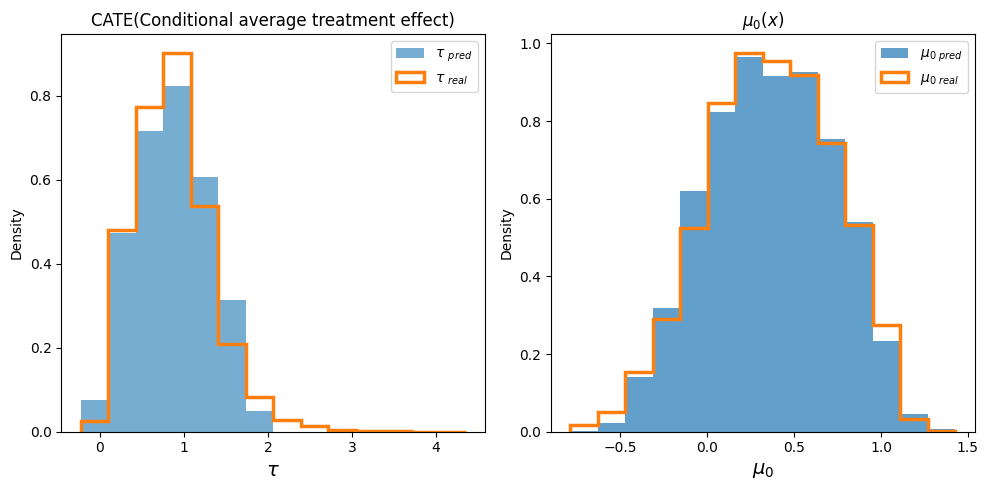

In [2]:
import numpy as np
from causal_nets import causal_net_estimate
from scipy.stats import norm
from sklearn.model_selection import train_test_split

PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION = "python"  # add this
from causal_nets import causal_net_estimate

# Setting the seeds
np.random.seed(3)

# Generating the fake data
N = 10000
X = np.random.uniform(low=0, high=1, size=[N, 10])
mu0_real = (
    1.5
    + 0.012 * X[:, 3]
    - 0.75 * X[:, 5] * X[:, 7]
    - 0.9 * X[:, 4]
    - np.mean(X, axis=1)
)
tau_real = X[:, 2] + 0.04 * X[:, 9] - 0.35 * np.log(X[:, 3])
prob_of_T = 0.5
T = np.random.binomial(size=N, n=1, p=prob_of_T)
normal_errors = np.random.normal(
    size=[
        N,
    ],
    loc=0.0,
    scale=1.0,
)
Y = mu0_real + tau_real * T + normal_errors

# Creating training and validation dataset
X_train, X_valid, T_train, T_valid, Y_train, Y_valid = train_test_split(
    X,
    T,
    Y,
    test_size=0.2,
    random_state=42,
)


# Getting causal estimates
(
    tau_pred,
    mu0_pred,
    prob_t_pred,
    psi_0,
    psi_1,
    history,
    history_ps,
) = causal_net_estimate(
    [X_train, T_train, Y_train],
    [X_valid, T_valid, Y_valid],
    [X, T, Y],
    [60, 30],
    dropout_rates=None,
    batch_size=None,
    alpha=0.0,
    r_par=0.2,
    optimizer="Adam",
    learning_rate=0.0009,
    max_epochs_without_change=30,
    max_nepochs=5000,
    seed=None,
    estimate_ps=False,
    verbose=True,
)

# Plotting estimated coefficient vs true coefficients
plt.figure(figsize=(10, 5))
plt.clf()

plt.subplot(1, 2, 1)
bins = np.linspace(
    min(float(min(tau_pred)), float(min(tau_real))),
    max(float(max(tau_pred)), float(max(tau_real))),
    15,
)
plt.hist(tau_pred, alpha=0.6, label=r"$\tau~_{pred}$", density=True, bins=bins)
plt.hist(
    tau_real,
    label=r"$\tau~_{ real}$",
    histtype="step",
    density=True,
    linewidth=2.5,
    bins=bins,
)
plt.legend(loc="upper right")
plt.title("CATE(Conditional average treatment effect)")
plt.xlabel(r"$\tau$", fontsize=14)
plt.ylabel("Density")

plt.subplot(1, 2, 2)
bins = np.linspace(
    min(float(min(mu0_pred)), float(min(mu0_real))),
    max(float(max(mu0_pred)), float(max(mu0_real))),
    15,
)
plt.hist(mu0_pred, alpha=0.7, label=r"$\mu_{0~pred}$", density=True, bins=bins)
plt.hist(
    mu0_real,
    label=r"$\mu_{0~real}$",
    histtype="step",
    density=True,
    linewidth=2.5,
    bins=bins,
)
plt.legend(loc="upper right")
plt.title(r"$\mu_0(x)$")
plt.xlabel(r"$\mu_0$", fontsize=14)
plt.ylabel("Density")

plt.tight_layout()
plt.show()

# Calculate the average treatment effect
ate = np.mean(psi_1 - psi_0)

# Calculate the 95% confidence interval for average treatment effect
CI_lowerbound = ate - norm.ppf(0.975) * np.std(psi_1 - psi_0) / np.sqrt(len(psi_0))
CI_upperbound = ate + norm.ppf(0.975) * np.std(psi_1 - psi_0) / np.sqrt(len(psi_0))

In [ ]:
CI_lowerbound = ate - norm.ppf(0.975) * np.std(psi_1 - psi_0) / np.sqrt(len(psi_0))
CI_upperbound = ate + norm.ppf(0.975) * np.std(psi_1 - psi_0) / np.sqrt(len(psi_0))

- pip install tensoflow==2.10.0
- pip install protobuf==3.11.3
- pip uninstall protobuf
- conda install protobuf
- pip install 


# Monte Carlo for Deep Learning and propensity scores - self made

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Function to generate synthetic data


def generate_data(N, num_features):
    np.random.seed(42)
    X = np.random.randn(N, num_features)
    A = np.random.randint(0, 2, size=N)
    B = np.random.randint(0, 2, size=N)
    C = A * B  # Interaction term of A and B
    true_beta_A = 2
    true_beta_B = 3
    true_beta_C = 6

    control_1 = np.random.normal(0, 1, size=N)
    control_2 = np.random.normal(0, 1, size=N)

    mean_error = 0  # Mean of the error term
    std_error = 10  # Standard deviation of the error term
    error = np.random.normal(mean_error, std_error, size=N)

    propensity_scores = 1 / (1 + np.exp(-C))
    treatment_assignment = np.random.binomial(1, propensity_scores)

    # Generate normally distributed outcome variable (wage)
    mean_wage = 50  # Mean wage
    y = (
        mean_wage
        + true_beta_A * A
        + true_beta_B * B
        + true_beta_C * C
        + control_1
        + control_2
        + error
    )

    return X, treatment_assignment, y, true_beta_A, true_beta_B, true_beta_C


# Function to train the neural network
from tensorflow.keras import regularizers


def train_nn(
    X_train,
    y_train,
    num_features,
    epochs,
    batch_size,
    learning_rate,
    l2_penalty=0.01,
):
    model = Sequential(
        [
            Dense(
                64,
                activation="relu",
                input_shape=(num_features,),
                kernel_regularizer=regularizers.l2(l2_penalty),
            ),
            Dropout(0.2),
            Dense(
                32,
                activation="relu",
                kernel_regularizer=regularizers.l2(l2_penalty),
            ),
            Dropout(0.2),
            Dense(1),
        ],
    )
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss="mse")
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
    return model


# Function to estimate coefficients


def estimate_coefficients(model):
    return model.layers[-1].get_weights()[0].flatten()


# Function for Monte Carlo simulation


def monte_carlo_simulation(
    num_simulations,
    N,
    num_features,
    epochs,
    batch_size,
    learning_rate,
):
    true_beta_A_list = []
    true_beta_B_list = []
    true_beta_C_list = []
    estimated_beta_A_list = []
    estimated_beta_B_list = []
    estimated_beta_C_list = []
    for _ in range(num_simulations):
        (
            X,
            treatment_assignment,
            y,
            true_beta_A,
            true_beta_B,
            true_beta_C,
        ) = generate_data(N, num_features)
        X_train, X_test, y_train, y_test = train_test_split(
            X,
            y,
            test_size=0.2,
            random_state=42,
        )
        model = train_nn(
            X_train,
            y_train,
            num_features,
            epochs,
            batch_size,
            learning_rate,
        )
        true_beta_A_list.append(true_beta_A)
        true_beta_B_list.append(true_beta_B)
        true_beta_C_list.append(true_beta_C)
        estimated_coefficients = estimate_coefficients(model)
        estimated_beta_A_list.append(estimated_coefficients[0])
        estimated_beta_B_list.append(estimated_coefficients[1])
        estimated_beta_C_list.append(estimated_coefficients[2])
    return (true_beta_A_list, true_beta_B_list, true_beta_C_list), (
        estimated_beta_A_list,
        estimated_beta_B_list,
        estimated_beta_C_list,
    )


# Parameters
num_simulations = 10  # Number of simulations
N = 1000  # Number of samples
num_features = 5  # Number of features
epochs = 5000  # Number of epochs
batch_size = 32  # Batch size
learning_rate = 0.001  # Learning rate

# Run Monte Carlo simulation
true_values, estimated_values = monte_carlo_simulation(
    num_simulations,
    N,
    num_features,
    epochs,
    batch_size,
    learning_rate,
)

# Calculate average absolute errors
errors_A = np.abs(np.array(true_values[0]) - np.array(estimated_values[0]))
errors_B = np.abs(np.array(true_values[1]) - np.array(estimated_values[1]))
errors_C = np.abs(np.array(true_values[2]) - np.array(estimated_values[2]))

# Calculate average estimated coefficients
avg_estimated_beta_A = np.mean(estimated_values[0])
avg_estimated_beta_B = np.mean(estimated_values[1])
avg_estimated_beta_C = np.mean(estimated_values[2])

print("Average Absolute Error for Beta_A:", np.mean(errors_A))
print("Average Absolute Error for Beta_B:", np.mean(errors_B))
print("Average Absolute Error for Beta_C:", np.mean(errors_C))

print("\nAverage Estimated Coefficients:")
print("Average Beta_A:", avg_estimated_beta_A)
print("Average Beta_B:", avg_estimated_beta_B)
print("Average Beta_C:", avg_estimated_beta_C)

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract true and estimated beta values
true_beta_A_list, true_beta_B_list, true_beta_C_list = true_values
estimated_beta_A_list, estimated_beta_B_list, estimated_beta_C_list = estimated_values

# Create kernel density plot for beta coefficients
sns.kdeplot(true_beta_A_list, label="True Beta A", fill=True, color="blue")
sns.kdeplot(true_beta_B_list, label="True Beta B", fill=True, color="orange")
sns.kdeplot(true_beta_C_list, label="True Beta C", fill=True, color="green")
sns.kdeplot(estimated_beta_A_list, label="Estimated Beta A", fill=True)
sns.kdeplot(estimated_beta_B_list, label="Estimated Beta B", fill=True)
sns.kdeplot(estimated_beta_C_list, label="Estimated Beta C", fill=True)

# Add vertical lines for true coefficients
plt.axvline(
    np.mean(true_beta_A_list),
    color="blue",
    linestyle="--",
    label="Mean True Beta A",
)
plt.axvline(
    np.mean(true_beta_B_list),
    color="orange",
    linestyle="--",
    label="Mean True Beta B",
)
plt.axvline(
    np.mean(true_beta_C_list),
    color="green",
    linestyle="--",
    label="Mean True Beta C",
)

# Add labels and title
plt.xlabel("Beta Coefficients")
plt.ylabel("Density")
plt.title("Kernel Density Plot of Beta Coefficients")

# Show legend
plt.legend()

# Show plot
plt.show()

# propensity scores approach

In [ ]:
def generate_data_with_propensity_scores(N, num_features):
    np.random.seed(42)
    X = np.random.randn(N, num_features)
    A = np.random.randint(0, 2, size=N)
    B = np.random.randint(0, 2, size=N)
    C = A * B  # Interaction term of A and B
    true_beta_A = 2
    true_beta_B = 3
    true_beta_C = 6

    control_1 = np.random.normal(0, 1, size=N)
    control_2 = np.random.normal(0, 1, size=N)

    mean_error = 0  # Mean of the error term
    std_error = 10  # Standard deviation of the error term
    error = np.random.normal(mean_error, std_error, size=N)

    propensity_scores = 1 / (1 + np.exp(-C))
    treatment_assignment = np.random.binomial(1, propensity_scores)

    # Generate normally distributed outcome variable (wage)
    mean_wage = 50  # Mean wage
    y = (
        mean_wage
        + true_beta_A * A
        + true_beta_B * B
        + true_beta_C * C
        + control_1
        + control_2
        + error
    )

    # Include propensity scores as features
    X = np.column_stack((X, propensity_scores))

    return X, treatment_assignment, y, true_beta_A, true_beta_B, true_beta_C

In [ ]:
def train_nn_with_propensity_scores(
    X_train,
    y_train,
    num_features,
    epochs,
    batch_size,
    learning_rate,
):
    model = Sequential(
        [
            Dense(
                64,
                activation="relu",
                input_shape=(num_features,),
            ),  # Input shape adjusted
            Dropout(0.2),
            Dense(32, activation="relu"),
            Dropout(0.2),
            Dense(1),
        ],
    )
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss="mse")
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
    return model

In [ ]:
def monte_carlo_simulation_with_propensity_scores(
    num_simulations,
    N,
    num_features,
    epochs,
    batch_size,
    learning_rate,
):
    true_beta_A_list = []
    true_beta_B_list = []
    true_beta_C_list = []
    estimated_beta_A_list = []
    estimated_beta_B_list = []
    estimated_beta_C_list = []

    for _ in range(num_simulations):
        (
            X,
            treatment_assignment,
            y,
            true_beta_A,
            true_beta_B,
            true_beta_C,
        ) = generate_data_with_propensity_scores(N, num_features)

        # Split data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(
            X,
            y,
            test_size=0.2,
            random_state=42,
        )

        # Train neural network model
        model = train_nn_with_propensity_scores(
            X_train,
            y_train,
            num_features + 1,  # Add 1 for propensity score feature
            epochs,
            batch_size,
            learning_rate,
        )

        # Compute true and estimated coefficients
        true_beta_A_list.append(true_beta_A)
        true_beta_B_list.append(true_beta_B)
        true_beta_C_list.append(true_beta_C)
        estimated_coefficients = estimate_coefficients(model)
        estimated_beta_A_list.append(estimated_coefficients[0])
        estimated_beta_B_list.append(estimated_coefficients[1])
        estimated_beta_C_list.append(estimated_coefficients[2])

    return (true_beta_A_list, true_beta_B_list, true_beta_C_list), (
        estimated_beta_A_list,
        estimated_beta_B_list,
        estimated_beta_C_list,
    )

In [ ]:
# Parameters
num_simulations = 100  # Number of simulations
N = 1000  # Number of samples
num_features = 5  # Number of features
epochs = 50  # Number of epochs
batch_size = 32  # Batch size
learning_rate = 0.001  # Learning rate

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
def estimate_coefficients(model):
    return model.layers[-1].get_weights()[0].flatten()

In [ ]:
# Run Monte Carlo simulation with propensity scores
(
    true_values_propensity,
    estimated_values_propensity,
) = monte_carlo_simulation_with_propensity_scores(
    num_simulations,
    N,
    num_features,
    epochs,
    batch_size,
    learning_rate,
)

# Calculate average absolute errors
errors_A_propensity = np.abs(
    np.array(true_values_propensity[0]) - np.array(estimated_values_propensity[0]),
)
errors_B_propensity = np.abs(
    np.array(true_values_propensity[1]) - np.array(estimated_values_propensity[1]),
)
errors_C_propensity = np.abs(
    np.array(true_values_propensity[2]) - np.array(estimated_values_propensity[2]),
)

# Calculate average estimated coefficients
avg_estimated_beta_A_propensity = np.mean(estimated_values_propensity[0])
avg_estimated_beta_B_propensity = np.mean(estimated_values_propensity[1])
avg_estimated_beta_C_propensity = np.mean(estimated_values_propensity[2])

print(
    "Average Absolute Error for Beta_A with Propensity Scores:",
    np.mean(errors_A_propensity),
)
print(
    "Average Absolute Error for Beta_B with Propensity Scores:",
    np.mean(errors_B_propensity),
)
print(
    "Average Absolute Error for Beta_C with Propensity Scores:",
    np.mean(errors_C_propensity),
)

print("\nAverage Estimated Coefficients with Propensity Scores:")
print("Average Beta_A:", avg_estimated_beta_A_propensity)
print("Average Beta_B:", avg_estimated_beta_B_propensity)
print("Average Beta_C:", avg_estimated_beta_C_propensity)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract estimated beta values with propensity scores
(
    estimated_beta_A_list_propensity,
    estimated_beta_B_list_propensity,
    estimated_beta_C_list_propensity,
) = estimated_values_propensity

# Create kernel density plot for estimated beta coefficients with propensity scores
sns.kdeplot(
    estimated_beta_A_list_propensity,
    label="Estimated Beta A with Propensity Scores",
    shade=True,
)
sns.kdeplot(
    estimated_beta_B_list_propensity,
    label="Estimated Beta B with Propensity Scores",
    shade=True,
)
sns.kdeplot(
    estimated_beta_C_list_propensity,
    label="Estimated Beta C with Propensity Scores",
    shade=True,
)

# Add labels and title
plt.xlabel("Beta Coefficients")
plt.ylabel("Density")
plt.title("Kernel Density Plot of Estimated Beta Coefficients with Propensity Scores")

# Show legend
plt.legend()

# Show plot
plt.show()

# last try for today

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Function to generate synthetic data


def generate_data(N, num_features):
    np.random.seed(42)
    X = np.random.randn(N, num_features)
    A = np.random.randint(0, 2, size=N)
    B = np.random.randint(0, 2, size=N)
    C = A * B  # Interaction term of A and B
    true_beta_A = 2
    true_beta_B = 3
    true_beta_C = 6

    control_1 = np.random.normal(0, 1, size=N)
    control_2 = np.random.normal(0, 1, size=N)

    mean_error = 0  # Mean of the error term
    std_error = 10  # Standard deviation of the error term
    error = np.random.normal(mean_error, std_error, size=N)

    propensity_scores = 1 / (1 + np.exp(-C))
    treatment_assignment = np.random.binomial(1, propensity_scores)

    # Generate normally distributed outcome variable (wage)
    mean_wage = 50  # Mean wage
    y = (
        mean_wage
        + true_beta_A * A
        + true_beta_B * B
        + true_beta_C * C
        + control_1
        + control_2
        + error
    )

    return X, treatment_assignment, y, true_beta_A, true_beta_B, true_beta_C


# Function to train the neural network


def train_nn(X, y, num_features, epochs, batch_size, learning_rate):
    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        test_size=0.2,
        random_state=42,
    )
    model = Sequential(
        [
            Dense(64, activation="relu", input_shape=(num_features,)),
            Dropout(0.2),
            Dense(32, activation="relu"),
            Dropout(0.2),
            Dense(1),
        ],
    )
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss="mse")
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
    return model


# Function to estimate treatment effects using DID


def estimate_did(X, treatment_assignment, y, model):
    # Predict outcomes using the trained neural network
    predicted_outcomes = model.predict(X).flatten()

    # Combine observed outcomes and predicted outcomes
    df = pd.DataFrame(
        {"Y": y, "Y_predicted": predicted_outcomes, "Treatment": treatment_assignment},
    )

    # Compute differences in differences
    control_group = df[df["Treatment"] == 0]
    treatment_group = df[df["Treatment"] == 1]
    pre_period = control_group[control_group.index < len(control_group) // 2]
    post_period = control_group[control_group.index >= len(control_group) // 2]

    control_diff = post_period["Y"].mean() - pre_period["Y"].mean()
    return (
        treatment_group["Y_predicted"].mean() - treatment_group["Y"].mean()
    ) - control_diff


# Function for Monte Carlo simulation


def monte_carlo_simulation(
    num_simulations,
    N,
    num_features,
    epochs,
    batch_size,
    learning_rate,
):
    treatment_diffs = []
    for _ in range(num_simulations):
        (
            X,
            treatment_assignment,
            y,
            true_beta_A,
            true_beta_B,
            true_beta_C,
        ) = generate_data(N, num_features)
        model = train_nn(
            X,
            y,
            num_features,
            epochs,
            batch_size,
            learning_rate,
        )
        treatment_diff = estimate_did(X, treatment_assignment, y, model)
        treatment_diffs.append(treatment_diff)
    return treatment_diffs


# Parameters
num_simulations = 100  # Number of simulations
N = 1000  # Number of samples
num_features = 5  # Number of features
epochs = 50  # Number of epochs
batch_size = 32  # Batch size
learning_rate = 0.001  # Learning rate

# Run Monte Carlo simulation
treatment_diffs = monte_carlo_simulation(
    num_simulations,
    N,
    num_features,
    epochs,
    batch_size,
    learning_rate,
)

# Calculate average treatment effect
avg_treatment_diff = np.mean(treatment_diffs)
print("Average treatment effect estimated using DID:", avg_treatment_diff)

In [ ]:
import matplotlib.pyplot as plt

# True treatment effect
true_effect = np.mean(treatment_diffs)

# Plot histogram of treatment effects
plt.figure(figsize=(8, 6))
plt.hist(
    treatment_diffs,
    bins=20,
    color="skyblue",
    edgecolor="black",
    label="Estimated Treatment Effect",
)
plt.axvline(x=true_effect, color="red", linestyle="--", label="True Treatment Effect")
plt.title("Distribution of Treatment Effects Estimated using DID")
plt.xlabel("Treatment Effect")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

# Monte Carlo for Deep Learning and propensity scores

In [ ]:
def sum_polynomial_X_times_weights(X, nconsumer_characteristics, weights):
    """Evaluate the non-linear part of a quadratic polynomial in
    consumer characteristics, X, with prescribed weights.

    Inputs:
    -------
        X: ndarray, shape = (N, nconsumer_characteristics)
            Feature matrix containing consumer characteristics.
        nconsumer_characteristics: int
            Number of consumer characteristics.
        weights: ndarray, shape = (num_additional_poly_terms, )
            Weights corresponding to quadratic terms.
    Outputs:
    -------
        sum_x: ndarray, shape = (N, 1)
            Non-linear part of the quadratic polynomial evaluated
            for each consumer.
    """
    from itertools import combinations_with_replacement

    my_polynomial_indices = combinations_with_replacement(
        list(range(nconsumer_characteristics)),
        2,
    )
    sum_x = 0
    for i, p in enumerate(my_polynomial_indices):
        sum_x = sum_x + weights[i] * np.multiply(X[:, p[0]], X[:, p[1]])
    return sum_x.reshape(-1, 1)

In [ ]:
# Assuming you have X, nconsumer_characteristics, and weights defined somewhere
import numpy as np

# Sample data
N = 1000  # Number of consumers
nconsumer_characteristics = 100  # Number of consumer characteristics
X = np.random.rand(N, nconsumer_characteristics)  # Feature matrix
weights = np.random.rand(
    nconsumer_characteristics * (nconsumer_characteristics + 1) // 2,
)  # Random weights
# Call the function
result = sum_polynomial_X_times_weights(X, nconsumer_characteristics, weights)

# Print the result
print("Result shape:", result.shape)
print("Result:")
print(result)

In [ ]:
def create_TE_coefs(X, nconsumer_characteristics, model="quadratic"):
    """Create treatment effect coefficients.

    Inputs:
    -------
        X: ndarray, shape = (N, nconsumer_characteristics)
            Feature matrix containing consumer characteristics.
        nconsumer_characteristics: int
            Number of consumer characteristics.
        model: str, optional
            Type of model to use for coefficients. Default is 'simple'.
            Options are {'simple', 'quadratic'}.

    Outputs:
    -------
        bias_tau: float
            Constant term in equation for tau.
        alpha_tau: ndarray, shape = [nconsumer_characteristics]
            Linear coefficients in equation for tau.
        beta_tau: ndarray or None
            Quadratic coefficients in equation for tau.
            If model is 'quadratic', returns coefficients.
            Otherwise, returns None.
    """
    np.random.seed(63)

    # Calculating tau
    alpha_tau = np.random.uniform(low=0.1, high=0.22, size=nconsumer_characteristics)
    bias_tau = -0.05
    tau = np.dot(X, alpha_tau) + bias_tau

    if model == "quadratic":
        count = nconsumer_characteristics * (nconsumer_characteristics + 1) // 2
        beta_tau = np.random.uniform(low=-0.05, high=0.06, size=count)
        tau = tau + sum_polynomial_X_times_weights(
            X,
            nconsumer_characteristics,
            beta_tau,
        )
    else:
        beta_tau = None

    # Calculating mu0
    alpha_mu0 = np.random.normal(loc=0.3, scale=0.7, size=nconsumer_characteristics)
    bias_mu0 = 0.09
    mu0 = np.dot(X, alpha_mu0) + bias_mu0

    if model == "quadratic":
        beta_mu0 = np.random.normal(loc=0.01, scale=0.3, size=count)
        mu0 = mu0 + sum_polynomial_X_times_weights(
            X,
            nconsumer_characteristics,
            beta_mu0,
        )

    return bias_tau, alpha_tau, beta_tau, tau, mu0

In [ ]:
# Assuming you have nconsumer_characteristics defined somewhere
# Assuming you have X defined somewhere
# Call the function with 'simple' model
bias_tau, alpha_tau, beta_tau, tau, mu0 = create_TE_coefs(
    X,
    nconsumer_characteristics,
    model="quadtratic",
)

# Print the results
print("Bias_tau:", bias_tau)
print("Alpha_tau:", alpha_tau)
print("Beta_tau:", beta_tau)
print("tau:", tau)

In [ ]:
# Assuming you have nconsumer_characteristics defined somewhere
# Assuming you have X defined somewhere

# Call the function with 'quadratic' model
bias_tau, alpha_tau, beta_tau, tau, mu0 = create_TE_coefs(
    X,
    nconsumer_characteristics,
    model="quadratic",
)

# Print the results
print("Bias_tau:", bias_tau)
print("Alpha_tau:", alpha_tau)
print("Beta_tau:", beta_tau)

In [ ]:
def calculate_true_tau_mean(
    alpha_tau,
    bias_tau,
    beta_tau,
    model,
    nconsumer_characteristics,
):
    """Calculate true average treatment effect.

    Inputs:
    -------
        bias_tau: float
            Constant term in equation for tau.
        alpha_tau: ndarray, shape = [nconsumer_characteristics, 1]
            Linear coefficients in equation for tau.
        beta_tau: ndarray, shape = [count]
            Quadratic coefficients in equation for tau.
            Count is the number of the second degree terms in a
            quadratic polynomial where the number of variables is
            equal to the number of consumer characteristics.
        model: {'simple', 'quadratic'}
            If 'simple' coefficients a and b in the artificial
            dataset depend linearly on consumer characteristics.
            Otherwise, the dependence is quadratic.
        nconsumer_characteristics: int
            Number of consumer characteristics.
    """
    X = 0.5

    tau_true_mean = np.sum(X * alpha_tau) + bias_tau

    if model == "quadratic":
        count = nconsumer_characteristics * (nconsumer_characteristics + 1) // 2
        X_poly = 0.25 * np.ones(count)
        s = 0
        for i in range(nconsumer_characteristics):
            X_poly[s] = 1 / 3.0
            s = s + nconsumer_characteristics - i

        tau_true_mean = tau_true_mean + np.sum(X_poly * beta_tau)

    return tau_true_mean

In [ ]:
# Assuming you have alpha_tau, bias_tau, beta_tau, model, and nconsumer_characteristics defined somewhere
model = "quadratic"
# Call the function
tau_true_mean = calculate_true_tau_mean(
    alpha_tau,
    bias_tau,
    beta_tau,
    model,
    nconsumer_characteristics,
)

# Print the result
print("True average treatment effect:", tau_true_mean)

In [ ]:
def create_propensity_scores(X, N, treatment="random"):
    """Calculate propensity scores and create treatment variable for
    fake dataset.

    Inputs:
    -------
        X: ndarray, shape = (N, nconsumer_characteristics)
            Feature matrix containing consumer characteristics.
        N: int
            Number of consumers.
        treatment: {'random', 'not_random'}, optional
            If 'random', consumers are being treated at random.
            Otherwise, probability of being treated is a function
            of consumer characteristics. Default is 'random'.
    """
    if treatment == "random":
        prob_of_T = 0.5
        T = np.random.binomial(size=N, n=1, p=prob_of_T).reshape(N, 1)
    else:
        bias_p = 0.09
        np.random.seed(72)
        alpha_p = np.random.uniform(low=-0.55, high=0.55, size=[20, 1])
        # Probability of t only depends on the first 20 consumers' features
        p_of_t = np.dot(X[:, :20], alpha_p) + bias_p
        p_of_t = p_of_t.reshape(-1)
        prob_of_T = 1 / (1 + np.exp(-p_of_t))
        T = np.random.binomial(size=N, n=1, p=prob_of_T).reshape(N, 1)

    return T, prob_of_T

In [ ]:
# Assuming you have X, N, and treatment defined somewhere
# Call the function
T, prob_of_T = create_propensity_scores(X, N, treatment="")

# Print the results
print("Treatment variable (T):")
print(T)
print("Propensity scores:")
print(prob_of_T)

In [ ]:
import random


def create_fake_data(
    N,
    nconsumer_characteristics,
    model="quadtratic",
    verbose=False,
    treatment="random",
):
    seed = random.randint(1, 100000)
    if verbose:
        print("Seed number is: ", seed)
    np.random.seed(seed)

    X = np.random.uniform(low=0, high=1, size=[N, nconsumer_characteristics])
    normal_errors = np.random.normal(size=[N, 1], loc=0.0, scale=1.0)
    alpha_tau, bias_tau, beta_tau = create_TE_coefs(model, nconsumer_characteristics)
    tau_true_mean = calculate_true_tau_mean(alpha_tau, bias_tau, beta_tau, model)
    T = np.random.choice([0, 1], size=(N, 1)) if treatment == "random" else None
    prob_of_T = None
    if treatment == "not_random":
        prob_of_T = create_propensity_scores(X)
        T = np.random.binomial(1, prob_of_T, size=(N, 1))
    Y = mu0 + tau * T + normal_errors
    return Y, X, T, seed, prob_of_T, tau_true_mean

In [ ]:
# Assuming you have the required parameters defined
N = 1000
nconsumer_characteristics = 100
model = "quadratic"  # Specify the model type, either 'simple' or 'quadratic'
verbose = True
treatment = "not_random"  # Specify the treatment type, either 'random' or 'not_random'

# Call the function
Y, X, T, seed, prob_of_T, tau_true_mean = create_fake_data(
    N,
    nconsumer_characteristics,
    model,
    verbose,
    treatment,
)

# Print or use the generated data as needed
print("Generated data:")
print("Y:", Y)
print("X:", X)
print("Mu0:", mu0)
print("Tau:", tau)
print("T:", T)
print("Seed:", seed)
print("Probability of T:", prob_of_T)
print("True average treatment effect:", tau_true_mean)

# Monte Carlo for 2xt DifDif

# Latest system for difference in difference estimation

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [ ]:
N = 1000  # Number of simulations
T = 10  # Number of observations per group
beta = 2.0  # True treatment effect
gamma = 0.5  # True time trend coefficient
sigma = 1.0  # Standard deviation of error term

# Initialize arrays to store results
bias = []
rmse = []

In [ ]:
# Generate data
pre_treatment = np.random.normal(0, sigma, (T, 2))  # Two groups: treatment and control
time_trend = np.arange(1, T + 1) * gamma
post_treatment = pre_treatment.copy()
post_treatment[:, 0] += beta  # Introduce treatment effect for treatment group
post_treatment[:, :] += time_trend.reshape(-1, 1)  # Add time trend

# Combine pre and post treatment data
data = np.vstack((pre_treatment, post_treatment))
groups = np.repeat(["Control", "Treatment"], T)
time_periods = np.repeat(np.arange(1, T + 1), 2)

df = pd.DataFrame({"Group": groups, "Time": time_periods, "Outcome": data.flatten()})

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Define parameters
N = 1000  # Number of simulations
T = 10  # Number of observations per group
beta = 2.0  # True treatment effect
gamma = 0.5  # True time trend coefficient
sigma = 1.0  # Standard deviation of error term

# Initialize arrays to store results
bias = []
rmse = []

# Run simulations
for _ in range(N):
    # Generate data
    pre_treatment = np.random.normal(
        0,
        sigma,
        (T, 2),
    )  # Two groups: treatment and control
    time_trend = np.arange(1, T + 1) * gamma
    post_treatment = pre_treatment.copy()
    post_treatment[:, 0] += beta  # Introduce treatment effect for treatment group
    post_treatment[:, :] += time_trend.reshape(-1, 1)  # Add time trend

    # Combine pre and post treatment data
    data = np.vstack((pre_treatment, post_treatment))
    groups = np.repeat(["Control", "Treatment"], T)
    time_periods = np.repeat(np.arange(1, T + 1), 2)

    df = pd.DataFrame(
        {"Group": groups, "Time": time_periods, "Outcome": data.flatten()},
    )

    # Run DiD regression
    df["Treat"] = (df["Group"] == "Treatment").astype(int)
    df["Post"] = (df["Time"] > T).astype(int)
    df["Treat_Post"] = df["Treat"] * df["Post"]

    X = df[["Treat", "Post", "Treat_Post"]]
    X = sm.add_constant(X)
    y = df["Outcome"]

    model = sm.OLS(y, X).fit()

    # Extract estimated treatment effect
    est_beta = model.params["Treat_Post"]

    # Calculate bias and RMSE
    bias.append(est_beta - beta)
    rmse.append((est_beta - beta) ** 2)

# Calculate mean bias and RMSE
mean_bias = np.mean(bias)
mean_rmse = np.sqrt(np.mean(rmse))

print("Mean Bias:", mean_bias)
print("RMSE:", mean_rmse)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

In [ ]:
# Define function to generate synthetic data with known true ATE


def generate_data_with_true_ate(n_samples, true_ate, seed):
    np.random.seed(seed)

    control_data = pd.DataFrame(
        {
            "individual": range(1, n_samples + 1),
            "Age": np.random.randint(20, 65, size=n_samples),
            "WagePartner_income": np.random.normal(
                loc=30000,
                scale=5000,
                size=n_samples,
            ),
            "education_level": np.random.choice(
                ["No High School", "High School", "Bachelor", "Master", "PhD"],
                size=n_samples,
            ),
            "time": np.random.choice([-2, -1, 1, 2, 3, 4, 5, 6, 7, 8], size=n_samples),
        },
    )

    fq_levels = ["Low", "High"]
    reform_levels = ["Before", "After"]
    categorical_data = pd.DataFrame(
        {
            "individual": range(1, n_samples + 1),
            "FQ": np.random.choice(fq_levels, size=n_samples),
            "Reform": np.random.choice(reform_levels, size=n_samples),
        },
    )

    fq_encoding = {"Low": 0, "High": 1}
    reform_encoding = {"Before": 0, "After": 1}
    categorical_data["FQ_encoded"] = categorical_data["FQ"].map(fq_encoding)
    categorical_data["Reform_encoded"] = categorical_data["Reform"].map(reform_encoding)

    categorical_data["interaction_effect"] = (
        categorical_data["FQ_encoded"] * categorical_data["Reform_encoded"]
    )

    control_data["wage_year_male"] = np.random.normal(
        loc=30,
        scale=10,
        size=n_samples,
    ) * (1 + 0.1 * categorical_data["interaction_effect"])
    control_data["wage_year_female"] = control_data["WagePartner_income"]
    control_data["dependent_variable"] = (
        control_data["wage_year_male"] - control_data["wage_year_female"]
    )

    education_encoding = {
        "No High School": 0,
        "High School": 1,
        "Bachelor": 2,
        "Master": 3,
        "PhD": 4,
    }
    control_data["education_level_encoded"] = control_data["education_level"].map(
        education_encoding,
    )

    data = pd.merge(control_data, categorical_data, on="individual")
    data = data.drop(["Reform", "FQ", "education_level"], axis=1)
    data = data.drop(
        ["WagePartner_income", "wage_year_male", "wage_year_female"],
        axis=1,
    )

    return data, true_ate

In [ ]:
# Function to compute Difference-in-Differences (DiD) with known true ATE


def difference_in_differences_known_ate(data):
    treatment_group = data[data["Reform_encoded"] == 1]
    control_group = data[data["Reform_encoded"] == 0]

    before_treatment_treatment_group = treatment_group[treatment_group["time"] < 0][
        "dependent_variable"
    ].mean()
    after_treatment_treatment_group = treatment_group[treatment_group["time"] > 0][
        "dependent_variable"
    ].mean()
    before_treatment_control_group = control_group[control_group["time"] < 0][
        "dependent_variable"
    ].mean()
    after_treatment_control_group = control_group[control_group["time"] > 0][
        "dependent_variable"
    ].mean()

    pre_treatment_difference = (
        before_treatment_treatment_group - before_treatment_control_group
    )
    post_treatment_difference = (
        after_treatment_treatment_group - after_treatment_control_group
    )

    return post_treatment_difference - pre_treatment_difference

In [ ]:
# Run Monte Carlo simulation with known true ATE
num_simulations = 1000
ate_results_with_true_ate = []

seed_value = 634

true_ate = 10  # Set true ATE value

In [ ]:
n_samples = 100
generate_data_with_true_ate(n_samples, true_ate, seed_value)

In [ ]:
for i in range(num_simulations):
    seed = seed_value + i
    synthetic_data, true_ate = generate_data_with_true_ate(
        n_samples=1000,  # sample size
        true_ate=true_ate,
        seed=seed,
    )
    ate = difference_in_differences_known_ate(synthetic_data)

# Calculate mean and standard error of estimated ATE

# Calculate mean and standard error of estimated ATE
ate_results_with_true_ate = np.array(ate_results_with_true_ate)
mean_ate = np.mean(ate)
std_err_ate = np.std(ate, ddof=1) / np.sqrt(
    num_simulations,
)

# Calculate t-value
t_value_ate = mean_ate / std_err_ate

# Calculate p-value
degrees_of_freedom = num_simulations - 1
p_value_sim_ate = stats.t.cdf(
    t_value_ate,
    df=degrees_of_freedom,
)  # richtige verteilung?
critical_value_simulated = stats.t.ppf((1 + 0.95) / 2, df=degrees_of_freedom)

# Calculate confidence interval for simulated ATE

mean_ate_simulated = np.mean(ate)
std_err_ate_simulated = np.std(ate, ddof=1) / np.sqrt(
    num_simulations,
)
margin_of_error_simulated = critical_value_simulated * std_err_ate_simulated
lower_bound_simulated = mean_ate_simulated - margin_of_error_simulated
upper_bound_simulated = mean_ate_simulated + margin_of_error_simulated


# Calculate confidence interval for true ATE
critical_value_with_true_ate = stats.t.ppf((1 + 0.95) / 2, df=degrees_of_freedom)
margin_of_error_with_true_ate = critical_value_with_true_ate * std_err_ate
lower_bound_with_true_ate = true_ate - margin_of_error_with_true_ate
upper_bound_with_true_ate = true_ate + margin_of_error_with_true_ate

In [ ]:
# Print summary statistics

# Print summary statistics
print("Mean ATE with known true ATE:", 10)
print(
    "Confidence Interval for simulated ATE:",
    (lower_bound_simulated, upper_bound_simulated),
)
print("Mean ATE of simulated ATE:", mean_ate)
print("Standard Error of simulated ATE:", std_err_ate)
print("t-value of simulated ATE:", t_value_ate)

In [ ]:
plt.figure(figsize=(14, 6))

# Histogram
plt.subplot(1, 2, 1)
plt.hist(
    ate_results_with_true_ate[:, 1],
    bins=30,
    color="skyblue",
    edgecolor="black",
    alpha=0.7,
    label="Simulated ATE",
)
plt.axvline(
    mean_ate_with_true_ate,
    color="red",
    linestyle="--",
    linewidth=1.5,
    label="Mean Simulated ATE",
)
plt.axvline(true_ate, color="green", linestyle="--", linewidth=1.5, label="True ATE")
plt.xlabel("Average Treatment Effect (ATE)")
plt.ylabel("Frequency")
plt.title("Distribution of Simulated Average Treatment Effects (ATE)")
plt.legend()
plt.grid(True)

In [ ]:
# Boxplot
plt.subplot(1, 2, 2)
plt.boxplot(
    [ate_results_with_true_ate[:, 1], [true_ate]],
    labels=["Simulated ATE", "True ATE"],
)
plt.ylabel("Average Treatment Effect (ATE)")
plt.title("Boxplot of Simulated and True Average Treatment Effects (ATE)")

plt.tight_layout()
plt.show()

CTE

\[ Y_{it} = \beta_0 + \beta_1 \text{Post}_t + \beta_2 \text{Treatment}_i + \beta_3 (\text{Post}_t \times \text{Treatment}_i) + \delta (\text{Post}_t \times \text{Treatment}_i) + \epsilon_{it} \]

Where:
- \( Y_{it} \) represents the outcome variable (e.g., wages) for individual \( i \) at time \( t \).
- \( \text{Post}_t \) is a binary variable indicating whether the observation is from the post-treatment period.
- \( \text{Treatment}_i \) is a binary variable indicating whether individual \( i \) is in the treatment group.
- \( \delta \) represents the coefficient for the interaction between the post-treatment period and the treatment group, capturing the average treatment effect (ATE).
- \( \epsilon_{it} \) is the error term.


ATE

\[ Y_{it} = \beta_0 + \beta_1 \text{Post}_t + \beta_2 \text{Treatment}_i + \beta_3 (\text{Post}_t \times \text{Treatment}_i) + \sum_{k=1}^{K} \beta_{k+3} (\text{X}_i = k \times \text{Treatment}_i) + \epsilon_{it} \]

Where:
- \( Y_{it} \) represents the outcome variable (e.g., wages) for individual \( i \) at time \( t \).
- \( \text{Post}_t \) is a binary variable indicating whether the observation is from the post-treatment period.
- \( \text{Treatment}_i \) is a binary variable indicating whether individual \( i \) is in the treatment group.
- \( \text{X}_i \) is a categorical variable representing a conditioning variable (e.g., education level) for individual \( i \).
- \( K \) is the total number of levels of the conditioning variable.
- \( \beta_{k+3} \) represents the coefficient for the interaction between the conditioning variable level \( k \) and the treatment indicator.
- \( \epsilon_{it} \) is the error term.


## the modell converges very fast to the true value

- proposed changes: more zeroes in the income values 
- CATE and estimation with a non CATE DiD model

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats


def generate_data_with_true_ate(n_samples, true_ate, seed):
    np.random.seed(seed)

    control_data = pd.DataFrame(
        {
            "individual": range(1, n_samples + 1),
            "Age": np.random.randint(20, 65, size=n_samples),
            "WagePartner_income": np.random.normal(
                loc=30000,
                scale=5000,
                size=n_samples,
            ),
            "education_level": np.random.choice(
                ["No High School", "High School", "Bachelor", "Master", "PhD"],
                size=n_samples,
            ),
            "time": np.random.choice([-2, -1, 1, 2, 3, 4, 5, 6, 7, 8], size=n_samples),
        },
    )

    fq_levels = ["Low", "High"]
    reform_levels = ["Before", "After"]
    categorical_data = pd.DataFrame(
        {
            "individual": range(1, n_samples + 1),
            "FQ": np.random.choice(fq_levels, size=n_samples),
            "Reform": np.random.choice(reform_levels, size=n_samples),
        },
    )

    fq_encoding = {"Low": 0, "High": 1}
    reform_encoding = {"Before": 0, "After": 1}
    categorical_data["FQ_encoded"] = categorical_data["FQ"].map(fq_encoding)
    categorical_data["Reform_encoded"] = categorical_data["Reform"].map(reform_encoding)

    categorical_data["interaction_effect"] = (
        categorical_data["FQ_encoded"] * categorical_data["Reform_encoded"]
    )

    control_data["wage_year_male"] = np.random.normal(
        loc=30,
        scale=10,
        size=n_samples,
    ) * (1 + 0.1 * categorical_data["interaction_effect"])
    control_data["wage_year_female"] = control_data["WagePartner_income"]
    control_data["dependent_variable"] = (
        control_data["wage_year_male"] - control_data["wage_year_female"]
    )

    education_encoding = {
        "No High School": 0,
        "High School": 1,
        "Bachelor": 2,
        "Master": 3,
        "PhD": 4,
    }
    control_data["education_level_encoded"] = control_data["education_level"].map(
        education_encoding,
    )

    data = pd.merge(control_data, categorical_data, on="individual")
    data = data.drop(["Reform", "FQ", "education_level"], axis=1)
    data = data.drop(
        ["WagePartner_income", "wage_year_male", "wage_year_female"],
        axis=1,
    )

    return data, true_ate


def difference_in_differences_cte(data, conditioning_variable):
    # Define treatment and control groups
    treatment_group = data[data["Reform_encoded"] == 1]
    control_group = data[data["Reform_encoded"] == 0]

    # Initialize lists to store CTEs for each level of the conditioning variable
    ctes = []

    # Compute CTE for each level of the conditioning variable
    for level in data[conditioning_variable].unique():
        treatment_group_level = treatment_group[
            treatment_group[conditioning_variable] == level
        ]
        control_group_level = control_group[
            control_group[conditioning_variable] == level
        ]

        pre_diff_treatment_group = treatment_group_level[
            treatment_group_level["time"] < 0
        ]["dependent_variable"].mean()
        post_diff_treatment_group = treatment_group_level[
            treatment_group_level["time"] > 0
        ]["dependent_variable"].mean()
        pre_diff_control_group = control_group_level[control_group_level["time"] < 0][
            "dependent_variable"
        ].mean()
        post_diff_control_group = control_group_level[control_group_level["time"] > 0][
            "dependent_variable"
        ].mean()

        cte_treatment_group = post_diff_treatment_group - pre_diff_treatment_group
        cte_control_group = post_diff_control_group - pre_diff_control_group

        cte = cte_treatment_group - cte_control_group
        ctes.append(cte)

    # Compute overall CTE
    return sum(ctes)


# Generate data
num_simulations = 1000
seed_value = 42
true_ate = 10  # Adjust as needed
ate_results_with_true_ate = []

for i in range(num_simulations):
    seed = seed_value + i
    synthetic_data, _ = generate_data_with_true_ate(
        n_samples=1000,
        true_ate=true_ate,
        seed=seed,
    )
    cte = difference_in_differences_cte(synthetic_data, "education_level_encoded")
    ate_results_with_true_ate.append(cte)

# Calculate mean and standard error of estimated CTE
mean_cte_with_true_ate = np.mean(ate_results_with_true_ate)
std_err_cte_with_true_ate = np.std(ate_results_with_true_ate, ddof=1) / np.sqrt(
    num_simulations,
)

# Calculate t-value
t_value_with_true_ate = mean_cte_with_true_ate / std_err_cte_with_true_ate

# Calculate p-value
degrees_of_freedom = num_simulations - 1
p_value_with_true_ate = stats.t.cdf(t_value_with_true_ate, df=degrees_of_freedom)

# Calculate confidence interval for simulated CTE
critical_value_with_true_ate = stats.t.ppf((1 + 0.95) / 2, df=degrees_of_freedom)
margin_of_error_with_true_ate = critical_value_with_true_ate * std_err_cte_with_true_ate
lower_bound_with_true_ate = mean_cte_with_true_ate - margin_of_error_with_true_ate
upper_bound_with_true_ate = mean_cte_with_true_ate + margin_of_error_with_true_ate

# Print summary statistics
print("True CTE:", true_ate)
print("Mean CTE with known true CTE:", mean_cte_with_true_ate)
print("Standard Error of CTE with known true CTE:", std_err_cte_with_true_ate)
print("t-value with known true CTE:", t_value_with_true_ate)
print("p-value with known true CTE:", p_value_with_true_ate)
print(
    "Confidence Interval for simulated CTE:",
    (lower_bound_with_true_ate, upper_bound_with_true_ate),
)

In [ ]:
import matplotlib.pyplot as plt

# Plot histogram of simulated CTEs
plt.hist(
    ate_results_with_true_ate,
    bins=20,
    color="skyblue",
    edgecolor="black",
    alpha=0.7,
    label="Simulated CTEs",
)
plt.axvline(
    x=mean_cte_with_true_ate,
    color="red",
    linestyle="--",
    label="Mean Simulated CTE",
)

# Plot true CTE
plt.axvline(x=true_ate, color="green", linestyle="-", label="True CTE")

plt.xlabel("Conditional Treatment Effect (CTE)")
plt.ylabel("Frequency")
plt.title("Histogram of Simulated and True Conditional Treatment Effects")
plt.legend()
plt.show()